<a href="https://colab.research.google.com/github/hadissuryaalamin/Sentiment-Analysis-Emotion/blob/main/Template_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Which category most profitable in west region and profit each transaction is more than 50

# Preparing Data

In [14]:
import pandas as pd

In [70]:
df = pd.read_csv('/content/Superstore.csv', encoding='unicode_escape')
#check dtypes
print(df.dtypes)
print(df.head())

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Stand

In [33]:
#check unique value
def check_unique_values(dataframe, column=None):
    """
    Check unique values for a specific column or for all columns in the DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to check.
        column (str, optional): The specific column to check. If None, check all columns. Default is None.
    """
    if column:
        unique_values = dataframe[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print(f"Number of Unique Values: {len(unique_values)}")
        print("")
    else:
        for column in dataframe.columns:
            unique_values = dataframe[column].unique()
            print(f"Column: {column}")
            print(f"Unique Values: {unique_values}")
            print(f"Number of Unique Values: {len(unique_values)}")
            print("")

In [ ]:
#check spesific column
check_unique_values(df, column='Profit')

In [ ]:
#check all column
check_unique_values(df)

# 0. Handling Missing Data (optional)

In [ ]:
#belum

# 1. Converting

In [35]:
def convert_data_types(dataframe, columns_and_types):
    """
    Convert specified columns to specified data types including datetime.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the columns to be converted.
        columns_and_types (dict): A dictionary where keys are column names and values are desired data types.
            Valid data types: int, float, bool, str, datetime

    Returns:
        pd.DataFrame: The DataFrame with specified columns converted to specified data types.
    """
    for column, dtype in columns_and_types.items():
        if dtype == 'datetime':
            dataframe[column] = pd.to_datetime(dataframe[column])
        else:
            dataframe[column] = dataframe[column].astype(dtype)
    return dataframe

In [36]:
#insert column and dtypes that want to be converted
columns_and_types = {
    'Order Date': 'datetime',
    'Ship Date': 'datetime'
}

converted_df = convert_data_types(df, columns_and_types)
#recheck converting dtypes
print(converted_df.dtypes)

# 2. Filtering

In [63]:
def filter_data(dataframe, condition):
    """
    Filters a DataFrame based on a condition.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to be filtered.
        condition (str): The condition to filter the DataFrame with.

    Returns:
        pd.DataFrame: The filtered DataFrame.
    """
    filtered_df = dataframe[condition]
    return filtered_df

In [64]:
condition1 = df['Region'] == 'West'
condition2 = df['Profit'] > 50

filtered_df = filter_data(df, condition1 & condition2)
print(filtered_df.head())

    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
7        8  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
10      11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
11      12  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
13      14  CA-2016-161389 2016-12-05 2016-12-10  Standard Class    IM-15070   
24      25  CA-2015-106320 2015-09-25 2015-09-30  Standard Class    EB-13870   

      Customer Name   Segment        Country         City  ... Postal Code  \
7   Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   
10  Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   
11  Brosina Hoffman  Consumer  United States  Los Angeles  ...       90032   
13     Irene Maddox  Consumer  United States      Seattle  ...       98103   
24      Emily Burns  Consumer  United States         Orem  ...       84057   

    Region       Product ID         Category Sub-C

#3. Column Selecting

In [65]:
column_selected_df = filtered_df[['Region','Category','Profit']]

print(column_selected_df.head())

   Region         Category    Profit
7    West       Technology   90.7152
10   West        Furniture   85.3092
11   West       Technology   68.3568
13   West  Office Supplies  132.5922
24   West        Furniture  240.2649


# 4. Aggregating

In [66]:
def aggregate_data(dataframe, group_by_columns, aggregation_functions):
    """
    Aggregates data in a DataFrame based on specified columns and aggregation functions.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to be aggregated.
        group_by_columns (list): A list of column names to group by.
        aggregation_functions (dict): A dictionary where keys are column names and values are aggregation functions.

    Returns:
        pd.DataFrame: The aggregated DataFrame.
    """
    aggregated_df = dataframe.groupby(group_by_columns).agg(aggregation_functions).reset_index()
    return aggregated_df

In [67]:
aggregated_df = aggregate_data(column_selected_df, 'Category', 'sum')

print(aggregated_df)

          Category      Profit
0        Furniture  17409.3833
1  Office Supplies  37926.4257
2       Technology  43723.8178


<ipython-input-66-6ed9937b29b0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_df = dataframe.groupby(group_by_columns).agg(aggregation_functions).reset_index()


# 5. Sorting

In [68]:
def sort_data(dataframe, column_name, ascending=True):
    """
    Sorts a DataFrame based on a column.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to be sorted.
        column_name (str): The name of the column to sort by.
        ascending (bool, optional): Whether to sort in ascending order. Default is True.

    Returns:
        pd.DataFrame: The sorted DataFrame.
    """
    sorted_df = dataframe.sort_values(by=column_name, ascending=ascending)
    return sorted_df

In [69]:
sorted_df = sort_data(aggregated_df, 'Profit', ascending=False)

print(sorted_df.head())

          Category      Profit
2       Technology  43723.8178
1  Office Supplies  37926.4257
0        Furniture  17409.3833


# 6. Visualize

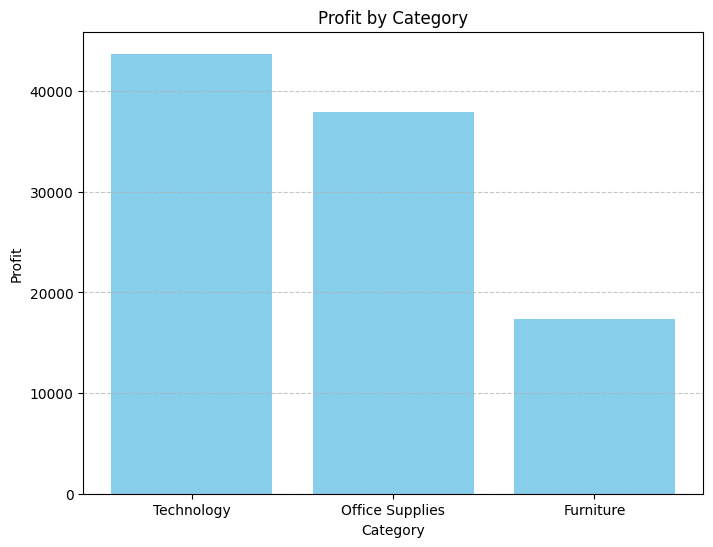

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(sorted_df['Category'], sorted_df['Profit'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit by Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()